* 코랩 한글 적용법: https://teddylee777.github.io/colab/colab-korean
* 코랩 구글 드라이브 적용법: https://rfriend.tistory.com/564

In [1]:
## Load Data from google drive
from google.colab import drive
drive.mount('/content/drive')

## 한글 폰트 mount
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 한글 폰트 사용을 위해서 세팅
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

## 이후 런타임 다시 시작 필수~!

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.font

In [2]:
## import module
import matplotlib.pyplot as plt
import pandas as pd

## Load Data
mamm_feature_week = pd.read_csv("/content/drive/MyDrive/[AM.SWU] 강남구 POS 데이터 매출 예측/processedData/매머드_주중_feature_clustered_실패.csv", index_col =False)

print(mamm_feature_week.shape)

(1125, 13)


In [342]:
mamm_feature_week["평균생활인구수"].max(), mamm_feature_week["평균생활인구수"].min()

(194179.53, 34224.16)

In [3]:
mamm_feature_week

,매장코드_영업일자_시간대,매장코드,매장명,기준일ID,주중/주말,시간대구분,상업지역 면적,평균생활인구수,평균매출,생활인구당 평균매출,실패여부,평균생활인구수_cl,상업지역 면적_cl
0,S53661_20190201_1,S53661,MMTH 역삼점,2019-02-01,0,1.0,203448.20,102461.88,37033.33,3614.35,1,중,상
1,S53661_20190201_2,S53661,MMTH 역삼점,2019-02-01,0,2.0,203448.20,149401.14,42600.00,2851.38,1,상,상
2,S53661_20190201_3,S53661,MMTH 역삼점,2019-02-01,0,3.0,203448.20,130305.51,17400.00,1335.32,1,상,상
3,S53661_20190207_1,S53661,MMTH 역삼점,2019-02-07,0,1.0,203448.20,94200.97,63225.00,6711.71,0,중,상
4,S53661_20190207_2,S53661,MMTH 역삼점,2019-02-07,0,2.0,203448.20,144196.27,34325.00,2380.44,1,상,상
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,T64222_20190227_4,T64222,MMTH 역삼GFC점,2019-02-27,0,4.0,103356.25,93636.11,45325.00,4840.55,1,중,하
1121,T64222_20190228_1,T64222,MMTH 역삼GFC점,2019-02-28,0,1.0,103356.25,100872.60,70550.00,6993.97,0,중,하
1122,T64222_20190228_2,T64222,MMTH 역삼GFC점,2019-02-28,0,2.0,103356.25,146583.15,225000.00,15349.65,0,상,하
1123,T64222_20190228_3,T64222,MMTH 역삼GFC점,2019-02-28,0,3.0,103356.25,138484.15,83375.00,6020.54,0,상,하


In [327]:
## Prepare the dataset
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

feature_col = ["시간대구분","상업지역 면적","평균생활인구수"]
rs = 42

def prepare_data(data):

  # 시간대구분, 주중/주말	원핫인코딩
  X = data.loc[:,feature_col]
  y = data["실패여부"]

  # split into train/test set
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rs ,stratify = y)

  num_attributes = ["상업지역 면적","평균생활인구수"]
  cat_attributes = ["시간대구분"]

  feature_pipeline = ColumnTransformer([
      ("num", StandardScaler(), num_attributes),
      ("cat", OneHotEncoder(), cat_attributes)
  ])

  feature_pipeline.fit(X_train)
  X_train_transformed = feature_pipeline.transform(X_train)
  X_test_transformed = feature_pipeline.transform(X_test)
  return X_train_transformed, y_train, X_test_transformed, y_test

In [37]:
## plotting을 위한 함수 
from sklearn.metrics import confusion_matrix

# confusion matrix plotting 함수
def plot_confusion_matrix(y_test, y_pred, plot_title):
    # 혼동행렬 시각화)
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, columns = ["나머지", "실패"], index = ["나머지", "실패"])

    #Plotting the confusion matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix - '+plot_title)
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()


In [200]:
import matplotlib.pyplot as plt
from numpy import average
import seaborn as sns
import pandas as pd

# 모델 평가를 위한 metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

## 모델 수행 코드
def model_execution(model, plot_title, x_train, y_train, x_test, y_test):

    # 모델 학습
    model.fit(x_train, y_train)
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    y_pred = model.predict(x_test)
    
    # 다중 분류이기 때문에 평균으로 냄
    test_acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Train Accuracy: {train_acc:.3f}")
    print(f"Test Accuracy: {test_acc:.3f}") # 정확도
    print(f"Precision: {precision:.3f}") # 정밀도
    print(f"Recall: {recall:.3f}") # 재현율
    print(f"F1-score: {f1:.3f}") # F1 스코어
    
    # confusion-matrix plot
    plot_confusion_matrix(y_test, y_pred, plot_title)
    return model

In [328]:
# Preprocessed and Split data into trainset, testset
X_train, y_train, X_test, y_test = prepare_data(mamm_feature_week)
print(X_train.shape, X_test.shape)

(843, 6) (282, 6)


Train Accuracy: 0.988
Test Accuracy: 0.865
Precision: 0.873
Recall: 0.817
F1-score: 0.844


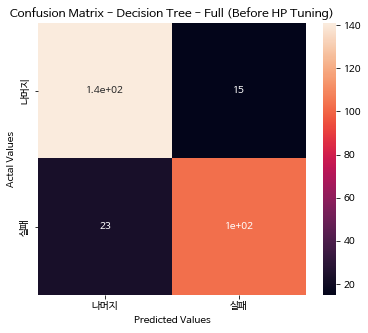

20

In [329]:
## 튜닝 전 Decision Tree - Full
from sklearn.tree import DecisionTreeClassifier
dt_model_week = model_execution(DecisionTreeClassifier(criterion='entropy'), "Decision Tree - Full (Before HP Tuning)",X_train, y_train, X_test, y_test)
dt_model_week.tree_.max_depth

Train Accuracy: 0.988
Test Accuracy: 0.872
Precision: 0.875
Recall: 0.833
F1-score: 0.854


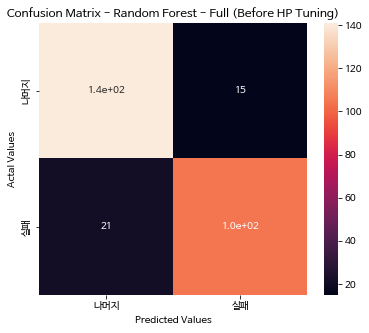

RandomForestClassifier(criterion='entropy')

In [330]:
## 튜닝 전 Random Forest - WEEKDAY
from sklearn.ensemble import RandomForestClassifier
model_execution(RandomForestClassifier(criterion='entropy'), "Random Forest - Full (Before HP Tuning)",X_train, y_train, X_test, y_test)

Train Accuracy: 0.864
Test Accuracy: 0.901
Precision: 0.883
Recall: 0.897
F1-score: 0.890


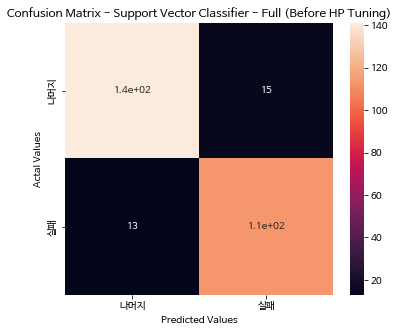

Train Accuracy: 0.861
Test Accuracy: 0.883
Precision: 0.860
Recall: 0.881
F1-score: 0.871


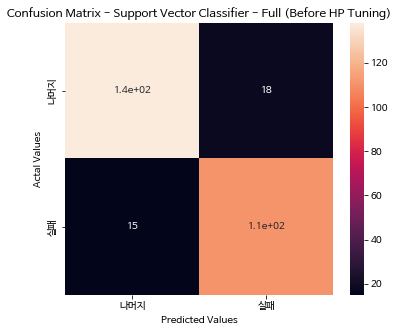

SVC(decision_function_shape='ovo', kernel='poly')

In [331]:
## Support Vector Classifier - Full
from sklearn.svm import SVC
model_execution(SVC(kernel='rbf'), "Support Vector Classifier - Full (Before HP Tuning)",X_train, y_train, X_test, y_test)
model_execution(SVC(kernel='poly', decision_function_shape = 'ovo'), "Support Vector Classifier - Full (Before HP Tuning)",X_train, y_train, X_test, y_test)

Train Accuracy: 0.945
Test Accuracy: 0.883
Precision: 0.872
Recall: 0.865
F1-score: 0.869


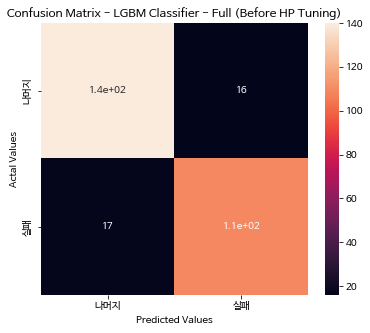

LGBMClassifier(metric='binary_logloss', objective='binary')

In [334]:
## LGBM - Full
from lightgbm import LGBMClassifier
model_execution(LGBMClassifier(objective='binary', metric= 'binary_logloss'), "LGBM Classifier - Full (Before HP Tuning)",X_train, y_train, X_test, y_test)

Train Accuracy: 0.904
Test Accuracy: 0.908
Precision: 0.868
Recall: 0.937
F1-score: 0.901


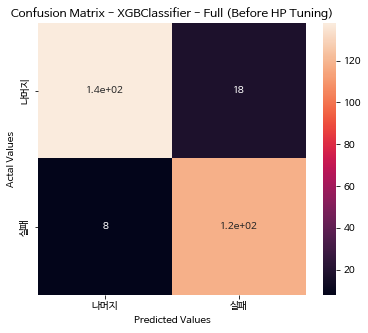

XGBClassifier()

In [338]:
## XGBOOST  - Full
from xgboost import XGBClassifier
model_execution(XGBClassifier(), "XGBClassifier - Full (Before HP Tuning)",X_train, y_train, X_test, y_test)

In [339]:
## StratifiedKFold cross-validaion 진행
from sklearn.model_selection import StratifiedKFold
import numpy as np

# split 개수, 셔플 여부 및 seed 설정
str_kf = StratifiedKFold(n_splits = 5, shuffle = True, random_state=rs)

def SKFold_validation(model, data):
  # 시간대구분, 주중/주말	원핫인코딩
  X = data.loc[:,feature_col]
  y = data["실패여부"]

  num_attributes = ["상업지역 면적","평균생활인구수"]
  cat_attributes = ["시간대구분"]

  feature_pipeline = ColumnTransformer([
      ("num", StandardScaler(), num_attributes),
      ("cat", OneHotEncoder(), cat_attributes)
  ])


  X = feature_pipeline.fit_transform(X)

  test_acc_hist = []
  train_acc_hist = []

  # split 개수 스텝 만큼 train, test 데이터셋을 매번 분할
  for train_index, test_index in str_kf.split(X, y):
      X_train, X_test = X[train_index], X[test_index]
      y_train, y_test = y[train_index], y[test_index]
      

      model.fit(X_train, y_train) # 모델 학습
      train_acc_hist.append(model.score(X_train, y_train)) # train 정확도 측정 및 기록

      y_pred = model.predict(X_test) # 예측 라벨
      test_acc_hist.append(accuracy_score(y_pred, y_test)) # test 정확도 측정 및 기록

  print("각 분할의 train 정확도 기록 :", train_acc_hist)
  print("평균 train 정확도 :", np.mean(train_acc_hist))
  print("각 분할의 test 정확도 기록 :", test_acc_hist)
  print("평균 test 정확도 :", np.mean(test_acc_hist))

In [340]:
## StratifiedKFold cross-validaion 진행
print("**** DT ****")
SKFold_validation(DecisionTreeClassifier(), mamm_feature_week)
print("**** RF ****")
SKFold_validation(RandomForestClassifier(), mamm_feature_week)
print("**** SVC ****")
SKFold_validation(SVC(kernel="rbf", gamma=5, C=8), mamm_feature_week)
print("**** LGBM ****")
SKFold_validation(LGBMClassifier(), mamm_feature_week)
print("**** XGB ****")
SKFold_validation(XGBClassifier(), mamm_feature_week)

**** DT ****
각 분할의 train 정확도 기록 : [0.9877777777777778, 0.9888888888888889, 0.9933333333333333, 0.9888888888888889, 0.9911111111111112]
평균 train 정확도 : 0.99
각 분할의 test 정확도 기록 : [0.8311111111111111, 0.8666666666666667, 0.88, 0.8755555555555555, 0.8622222222222222]
평균 test 정확도 : 0.8631111111111112
**** RF ****
각 분할의 train 정확도 기록 : [0.9877777777777778, 0.9888888888888889, 0.9933333333333333, 0.9888888888888889, 0.9911111111111112]
평균 train 정확도 : 0.99
각 분할의 test 정확도 기록 : [0.8622222222222222, 0.8666666666666667, 0.8755555555555555, 0.8844444444444445, 0.8533333333333334]
평균 test 정확도 : 0.8684444444444445
**** SVC ****
각 분할의 train 정확도 기록 : [0.9111111111111111, 0.8988888888888888, 0.9044444444444445, 0.9022222222222223, 0.9022222222222223]
평균 train 정확도 : 0.9037777777777778
각 분할의 test 정확도 기록 : [0.8711111111111111, 0.92, 0.8933333333333333, 0.8977777777777778, 0.8977777777777778]
평균 test 정확도 : 0.8960000000000001
**** LGBM ****
각 분할의 train 정확도 기록 : [0.9466666666666667, 0.9455555555555556, 0.9477777

In [28]:
! pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 5.2 MB/s 
     |████████████████████████████████| 81 kB 8.8 MB/s 
     |████████████████████████████████| 209 kB 60.9 MB/s 
     |████████████████████████████████| 78 kB 5.5 MB/s 
     |████████████████████████████████| 112 kB 55.7 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 147 kB 53.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=76e5505c1149dcb093155298502734996af8289fa33d32ab5e5ca5db4f3294cd
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [350]:
## Optuna를 활용한 Hyper parameter tuning
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# tuner, cross-validation 횟수 설정
n_trials = 100
k = 5

# Stratified k-fold CV 진행
#str_kf = StratifiedKFold(n_splits = k, shuffle = True, random_state=rs)
kfolds = KFold(n_splits=k, shuffle=True, random_state=rs)

## Decision Tree
def decisionTree_objective(trial: Trial, X, y):
  param = {
      'max_depth' : trial.suggest_int("max_depth", 2, 8),
      'min_samples_split' : trial.suggest_int("min_samples_split", 2, 50),
      'min_samples_leaf' : trial.suggest_int("min_samples_leaf", 2, 50),
      'criterion' : 'entropy'
    }
  
  # 학습 모델 생성
  model = DecisionTreeClassifier(**param)

  # Cross-validation 진행
  scores = cross_val_score(model, X, y, cv=kfolds, scoring="accuracy")

  return scores.mean()

## RandomForest
def randomForest_objective(trial: Trial, X, y):
  param = {
      'n_estimators' : trial.suggest_int('n_estimators', 50, 500),
      'max_depth' : trial.suggest_int('max_depth', 2, 8),
      'max_features' : trial.suggest_float('max_features', .1, 1),
      'min_samples_split' : trial.suggest_int('min_samples_leaf', 2, 20)
    }
  
  # 학습 모델 생성
  model = RandomForestClassifier(**param)

  # Cross-validation 진행
  scores = cross_val_score(model, X, y, cv=kfolds, scoring="accuracy")

  return scores.mean()

## XGBoost
def XGB_objective(trial: Trial, X, y):
  param = {
      'n_estimators' : trial.suggest_int('n_estimators', 50, 500),
      'max_depth' : trial.suggest_int('max_depth', 2, 6),
      'min_child_weight' : trial.suggest_int('min_child_weight', 1, 300),
      'learning_rate' : trial.suggest_float('learning_rate', .001, 10)
  }

  # 학습 모델 생성
  model = XGBClassifier(**param)
  
  # Cross-validation 진행
  scores = cross_val_score(model, X, y, cv=kfolds, scoring="accuracy")

  return scores.mean()

## LGBM
def LGBM_objective(trial: Trial, X, y):
  param = {
      'n_estimators' : trial.suggest_int('n_estimators', 50, 500),
      'num_leaves' : trial.suggest_int('num_leaves', 2, 6),
      'max_depth' : trial.suggest_int('max_depth', 2, 8),
      'min_child_samples' : trial.suggest_int('min_child_samples', 10, 30),
      'learning_rate' : trial.suggest_float('learning_rate', .001, 10),
      'objective' : 'binary', 
      'metric' : 'binary_logloss'
  }

  # 학습 모델 생성
  model = LGBMClassifier(**param)
  
  # Cross-validation 진행
  scores = cross_val_score(model, X, y, cv=kfolds, scoring="accuracy")

  return scores.mean()


## SVC
def SVC_objective(trial: Trial, X, y):
  param = {
      'gamma' : trial.suggest_float('gamma', 1, 2),
      'C' : trial.suggest_float('C', 1, 2),
      'kernel' : "rbf"
  }

  # 학습 모델 생성
  model = SVC(**param)
  
  # Cross-validation 진행
  scores = cross_val_score(model, X, y, cv=kfolds, scoring="accuracy")

  return scores.mean()


In [30]:
# Define the helper function so that it can be reused
def optuna_execution(obj, X_train, y_train, X_test, y_test):
  study = optuna.create_study(direction="maximize", sampler= TPESampler())

  title = obj.split()

  # 모델 설정
  if title[0] == "DecisionTree":
    objective = decisionTree_objective
    model = DecisionTreeClassifier
  elif title[0] == "RandomForest":
    objective = randomForest_objective
    model = RandomForestClassifier
  elif title[0] == "LGBM":
    objective = LGBM_objective
    model = LGBMClassifier
  elif title[0] == "XGBoost":
    objective = XGB_objective
    model = XGBClassifier
  elif title[0] == "SVC":
    objective = SVC_objective
    model = SVC

  study.optimize(lambda trial : objective(trial, X_train, y_train), n_trials = n_trials)

  params = study.best_params
  best_score = study.best_value
  print(f"Best score: {best_score}\n")
  print(f"Optimized parameters: {params}\n")

  
  # 마지막으로 검증 진행
  plot_title = obj+' (After HP Tuning)'
  model_execution(model(**params), plot_title, X_train, y_train, X_test, y_test)


[I 2022-07-27 09:03:28,297] A new study created in memory with name: no-name-97b6dd93-9123-4f78-ad6f-dfe221cbbb94
[I 2022-07-27 09:03:28,322] Trial 0 finished with value: 0.8090025359256128 and parameters: {'max_depth': 2, 'min_samples_split': 46, 'min_samples_leaf': 14}. Best is trial 0 with value: 0.8090025359256128.
[I 2022-07-27 09:03:28,342] Trial 1 finished with value: 0.8730980557903635 and parameters: {'max_depth': 8, 'min_samples_split': 39, 'min_samples_leaf': 11}. Best is trial 1 with value: 0.8730980557903635.
[I 2022-07-27 09:03:28,362] Trial 2 finished with value: 0.8802056917441533 and parameters: {'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.8802056917441533.
[I 2022-07-27 09:03:28,380] Trial 3 finished with value: 0.8066356720202874 and parameters: {'max_depth': 2, 'min_samples_split': 40, 'min_samples_leaf': 15}. Best is trial 2 with value: 0.8802056917441533.
[I 2022-07-27 09:03:28,399] Trial 4 finished with value: 0.8

Best score: 0.8837559876021415

Optimized parameters: {'max_depth': 5, 'min_samples_split': 43, 'min_samples_leaf': 2}

Train Accuracy: 0.894
Test Accuracy: 0.872
Precision: 0.857
Recall: 0.857
F1-score: 0.857


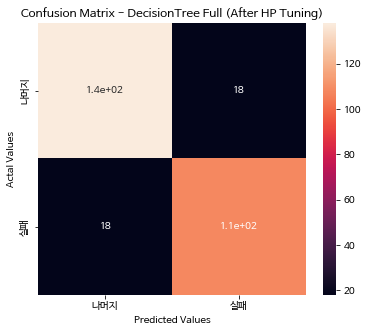

In [324]:
## Tuning Decision Tree - Full
optuna_execution("DecisionTree Full",X_train, y_train, X_test, y_test)

[I 2022-07-27 10:25:42,771] A new study created in memory with name: no-name-15e8a2ee-b131-4ba6-a7c7-0be2f01304f5
[I 2022-07-27 10:25:43,212] Trial 0 finished with value: 0.551577909270217 and parameters: {'n_estimators': 467, 'max_depth': 4, 'min_child_weight': 194, 'learning_rate': 0.5217947429315138}. Best is trial 0 with value: 0.551577909270217.
[I 2022-07-27 10:25:43,565] Trial 1 finished with value: 0.5862707805015498 and parameters: {'n_estimators': 383, 'max_depth': 6, 'min_child_weight': 46, 'learning_rate': 2.742138308384211}. Best is trial 1 with value: 0.5862707805015498.
[I 2022-07-27 10:25:43,867] Trial 2 finished with value: 0.551577909270217 and parameters: {'n_estimators': 323, 'max_depth': 3, 'min_child_weight': 19, 'learning_rate': 8.311545038451706}. Best is trial 1 with value: 0.5862707805015498.
[I 2022-07-27 10:25:44,279] Trial 3 finished with value: 0.5243589743589743 and parameters: {'n_estimators': 452, 'max_depth': 6, 'min_child_weight': 204, 'learning_rate'

Best score: 0.8695618484080022

Optimized parameters: {'n_estimators': 115, 'max_depth': 5, 'min_child_weight': 7, 'learning_rate': 0.48503636649057513}

Train Accuracy: 0.931
Test Accuracy: 0.894
Precision: 0.881
Recall: 0.881
F1-score: 0.881


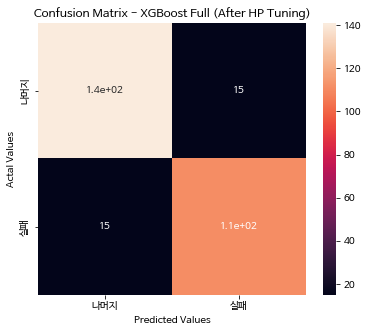

In [354]:
## Tuning XGB - Full
optuna_execution("XGBoost Full",X_train, y_train, X_test, y_test)

[I 2022-07-27 08:51:58,546] A new study created in memory with name: no-name-27f4e24c-2d7e-4ad0-835b-a57e70cca4e7
[I 2022-07-27 08:51:59,044] Trial 0 finished with value: 0.8280571992110455 and parameters: {'n_estimators': 60, 'max_depth': 2, 'max_features': 0.1825088959083319, 'min_samples_leaf': 17}. Best is trial 0 with value: 0.8280571992110455.
[I 2022-07-27 08:52:00,336] Trial 1 finished with value: 0.884967596506058 and parameters: {'n_estimators': 134, 'max_depth': 7, 'max_features': 0.9875772657705402, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.884967596506058.
[I 2022-07-27 08:52:03,743] Trial 2 finished with value: 0.8837912087912088 and parameters: {'n_estimators': 391, 'max_depth': 7, 'max_features': 0.4038659244463525, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.884967596506058.
[I 2022-07-27 08:52:07,369] Trial 3 finished with value: 0.8671597633136093 and parameters: {'n_estimators': 460, 'max_depth': 3, 'max_features': 0.14181104655207163, 'min_sam

Best score: 0.8908918005071852

Optimized parameters: {'n_estimators': 264, 'max_depth': 7, 'max_features': 0.14933807162995436, 'min_samples_leaf': 8}

Train Accuracy: 0.894
Test Accuracy: 0.883
Precision: 0.860
Recall: 0.881
F1-score: 0.871


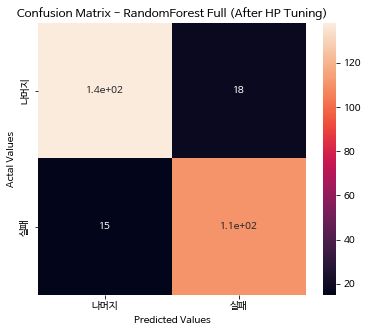

In [304]:
## Tuning Random Forest - Full
optuna_execution("RandomForest Full",X_train, y_train, X_test, y_test)

[I 2022-07-27 09:03:44,612] A new study created in memory with name: no-name-57e6600e-4882-458d-b9f8-05e74321951f
[I 2022-07-27 09:03:44,670] Trial 0 finished with value: 0.5051211608903917 and parameters: {'n_estimators': 126, 'num_leaves': 4, 'max_depth': 5, 'min_child_samples': 17, 'learning_rate': 4.554348779956557}. Best is trial 0 with value: 0.5051211608903917.
[I 2022-07-27 09:03:44,937] Trial 1 finished with value: 0.8564736545505776 and parameters: {'n_estimators': 488, 'num_leaves': 6, 'max_depth': 2, 'min_child_samples': 11, 'learning_rate': 0.3681073569454967}. Best is trial 1 with value: 0.8564736545505776.
[I 2022-07-27 09:03:45,134] Trial 2 finished with value: 0.7034939419554804 and parameters: {'n_estimators': 490, 'num_leaves': 5, 'max_depth': 2, 'min_child_samples': 30, 'learning_rate': 1.3714596710251938}. Best is trial 1 with value: 0.8564736545505776.
[I 2022-07-27 09:03:45,227] Trial 3 finished with value: 0.5622921949845027 and parameters: {'n_estimators': 335,

Best score: 0.8908988447449986

Optimized parameters: {'n_estimators': 143, 'num_leaves': 6, 'max_depth': 5, 'min_child_samples': 10, 'learning_rate': 0.06700956080926035}

Train Accuracy: 0.911
Test Accuracy: 0.908
Precision: 0.868
Recall: 0.937
F1-score: 0.901


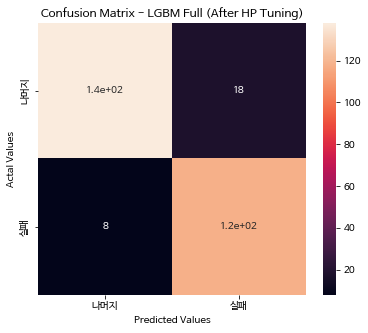

In [325]:
## Tuning LGBM - Full
optuna_execution("LGBM Full",X_train, y_train, X_test, y_test)

[I 2022-07-27 09:44:43,686] A new study created in memory with name: no-name-9b31ba4d-66cf-4746-abd1-dbf32d87d350
[I 2022-07-27 09:44:43,776] Trial 0 finished with value: 0.8695477599323752 and parameters: {'gamma': 1.13633466937674, 'C': 1.5746122919090109}. Best is trial 0 with value: 0.8695477599323752.
[I 2022-07-27 09:44:43,862] Trial 1 finished with value: 0.8814032121724429 and parameters: {'gamma': 1.8627801949145506, 'C': 1.8279231554142874}. Best is trial 1 with value: 0.8814032121724429.
[I 2022-07-27 09:44:43,944] Trial 2 finished with value: 0.8683643279797126 and parameters: {'gamma': 1.7844855318119421, 'C': 1.1343796534150887}. Best is trial 1 with value: 0.8814032121724429.
[I 2022-07-27 09:44:44,033] Trial 3 finished with value: 0.8683643279797126 and parameters: {'gamma': 1.7139901647010292, 'C': 1.1749901319304676}. Best is trial 1 with value: 0.8814032121724429.
[I 2022-07-27 09:44:44,113] Trial 4 finished with value: 0.8659904198365738 and parameters: {'gamma': 1.

Best score: 0.8861510284587208

Optimized parameters: {'gamma': 1.9983510359420333, 'C': 1.9971013734261183}

Train Accuracy: 0.897
Test Accuracy: 0.911
Precision: 0.874
Recall: 0.937
F1-score: 0.904


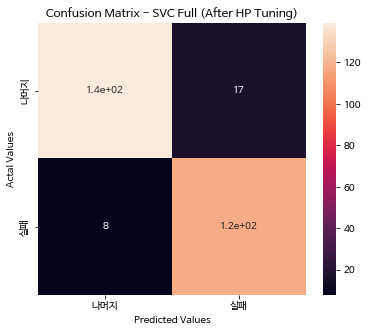

In [348]:
## Tuning SVC - Full
optuna_execution("SVC Full",X_train, y_train, X_test, y_test)